# HW #1

## Question 2.1: Probability Theory

> (10 pts) a: Implement a function, “coin_flip_prop”, that calculates the probability of having heads (ℎ) using `numpy.random.binomial(k, 𝜋, t)` = h, where k is the number of coins, 𝜋 is the probability of each coin, 𝑡 is the number of total flips, and h is head. 

> b: To confirm the `coin_flip_prop` function applicability, show that the probability reaches 0.5 as N increases from 1 to 200 when k=1. Make a visualization.  

**Imports**

In [56]:
import sys
print(f"For this hw, I used Python v{sys.version}")

import numpy as np
import pandas as pd
np.random.seed(559)

# please don't fail me, the libraries below are only used for visualzation purposes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For this hw, I used Python v3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


### 2.1.a The function

In [72]:
from numpy import random as np_random

def coin_flip_prop(k: int, N: int, heads_probability=0.5) -> float:
    """
    For this binomial distribution, we set the following parameters:
        k = # of coins, aka "trials" in this experiment
        𝜋 = 0.5, or the probability of "success"
            (which in this case is landing on heads)
        N = # of flips the user wants
            --> n = 50*N, which is the total number of flips
                (aka "tests") that we shall do

    Source docs: https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
    
    Returns: probability of having at least 1 heads
    """
    num_coins, num_tests = k, 50 * N
    samples_drawn = np_random.binomial(
        num_coins, heads_probability, num_tests
    )
    return sum(samples_drawn >= 1) / num_tests

In [29]:
coin_flip_prop(1, 1)  # sanity check - should be ~0.50

0.52

### 2.1.b The Visualization

In [45]:
num_flips = list(range(1, 201))
probabilities = [
    coin_flip_prop(1, flip_num) for flip_num in num_flips
]
expected_probability = [0.5 for _ in num_flips]

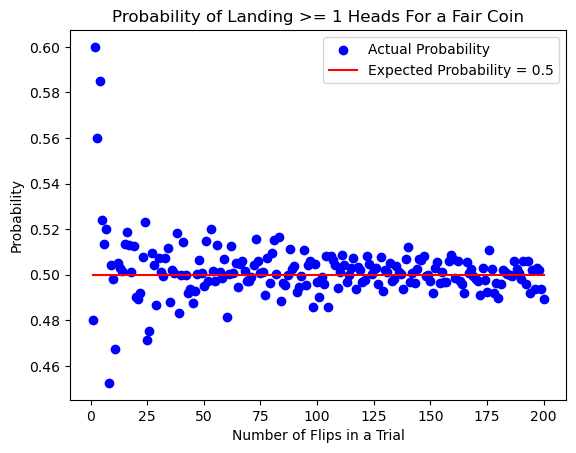

In [46]:
plt.scatter(num_flips, probabilities,
            color="blue", label="Actual Probability")
plt.plot(num_flips, expected_probability,
        color="red", label="Expected Probability = 0.5")
plt.legend()
plt.title("Probability of Landing >= 1 Heads For a Fair Coin")
plt.ylabel("Probability")
plt.xlabel("Number of Flips in a Trial")
plt.show()

As we can see above, most of the observed probabilities from each trial do indeed hover around `0.50` (with the exception of a outliers).

## Question 2.3: Average Probability

In [53]:
avg = round(sum(probabilities) / 200, 4)
print(f"The average probability across all trials where N = [1 ... 200]: {avg}.")

The average probability across all trials where N = [1 ... 200]: 0.5018.


## Question 3.1: Exploring Unlabeled Data

In [57]:
unlabelled_df = pd.read_csv("HW1_Q3.csv")
unlabelled_df.head()  # just testing if the data loaded

,var1,var2,var3
0,0.423136,0.593486,0
1,0.154896,0.450922,2
2,0.023467,0.585442,0
3,0.170294,0.386597,0
4,0.308482,0.893703,2


In [61]:
unlabelled_df["var3"].nunique()

3

I'm going to go out on a limb and guess that `var3` is supposed to be some kind of label for this dataset.
This is because unlike the other 2 features, it is discrete. And because it only has 3 unique values, it seems like the kind of thing we would want to cluster in `k = 3` groups for.

Perhaps `var1` and `var2` are predictors for `var3`? Let's use a heatmap:

/var/folders/n0/3kqw7k395kb6swksbngs7zw40000gn/T/ipykernel_10607/672460263.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


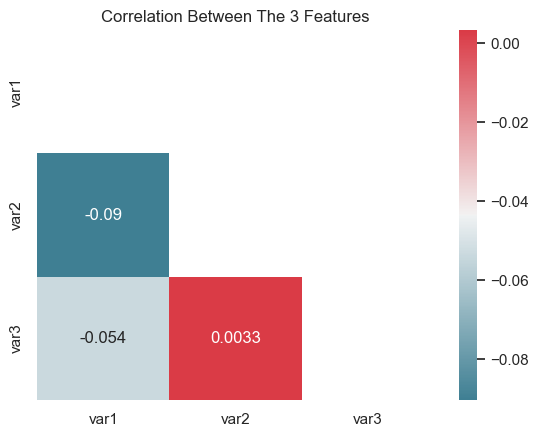

In [67]:
# Credit to the Seaborn Documentation for inspiring this cell: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = unlabelled_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.title('Correlation Between The 3 Features')
plt.show()

Ok, now we can see that `var1` is relatively negatively related to `var3`, while `var2` is relatively positively correlated.

This raises another question - before I can tell what `var1` and `var2` are, it might help seeing their distributions, both individually and in regards to each other:

/Applications/anaconda3/envs/559/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/envs/559/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


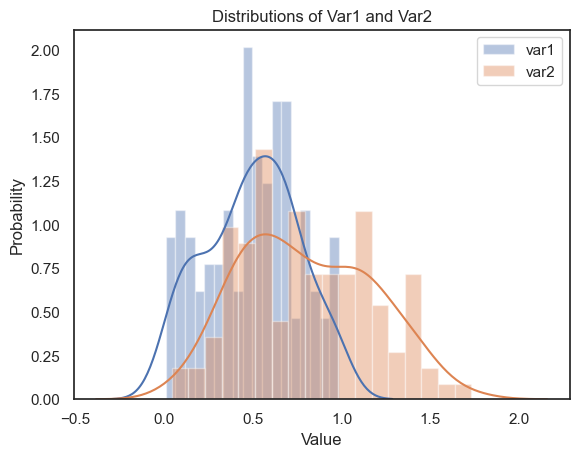

In [71]:
sns.distplot(unlabelled_df["var1"], hist=True, kde=True, bins=18, label='var1')
sns.distplot(unlabelled_df["var2"], hist=True, kde=True, bins=18, label='var2')
plt.legend()
plt.title("Distributions of Var1 and Var2")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

Ok so this is interesting:
- both features are within about the same interval of values, with `var2` having only a slightly larger min/max
- both appear to be somewhat Gaussian (although we could probably tease out subpopulations that would more closely resemble Gaussians)
- and there is some overlap, but not alot - we can see that some of the tallest bins for `var1` is where `var2` is the shortest, and vice versa. This further supports the negative correlation of `0.09` which we saw in the heatmap below.

Right, here's my take on what a real-life dataset might be that would resemble this:

- You have a dataset of performance logs for a large-scale, cloud-based software system that relies on a resizeable computing platform such as AWS EC 2
- `var3` shows different times we decided to 1) reduce the number of servers we currently have, 2) maintain the current number of servers, or 3) increase the number of servers running, so we could keep up with user demands on our software
- `var1` is the churn rate of our user base, at the time of the decision. This would be negative correlation, because (unfortunately) if we lose more users, then there's no need to have more servers running. 
- `var2` shows what was the aggregated load time for a single page across our servers, at the time of the decision (this would positively correlate, as longer load times means we need more servers runnning).

## Question 3.2: KMeans
> Implement a function KMeans using NumPy to cluster the data set for 
𝑘=3. 

In [149]:
from numpy.random import Generator

def myKMeans(X: pd.DataFrame, k=3) -> dict:
    """
    My implemenatation of the k-means algorithm in Python. 
    Relies heavily on NumPy and a lecture I found on MIT OCW:
        https://www.youtube.com/watch?v=esmzYhuFnds

    Returns: dict: contains the dict and covariance of each centroid
    """
    # A: init k random centroids from existing data
    rng = np.random.default_rng()
    centroids = rng.choice(X, size=(k,))
    # B: converge on optimal centroids
    keep_going = True
    iter = 0
    
    while keep_going is True:
        centroids_assigned_pts = dict(zip(range(k), [[] for _ in range(k)]))
        # 1: assign each point to a centroid
        for sample in X:
            centroid_assignment = np.argmin([
                np.linalg.norm(sample - centroids, axis=0)  # Euclidean distance
            ])
            centroids_assigned_pts[centroid_assignment].append(sample)
        # 2: update centroid placements themselves
        cap = centroids_assigned_pts  # just an abbreviation
        new_centroids = np.array([
            np.mean(np.array(cap[centroid_label]), axis=0)
            for centroid_label in centroids_assigned_pts.keys()
        ])
        # 3: decide if we should continue
        if np.equal(centroids, new_centroids).all():
            keep_going = False
        centroids = new_centroids[:]

    # C: collect the results
    centroid_coords_cov = dict()
    for centroid_label in centroids_assigned_pts:
        centroid_coords_cov[centroid_label] = (
            centroids[centroid_label],
            np.cov(centroids_assigned_pts[centroid_label], rowvar=False)
        )
    return centroid_coords_cov



## Question 3.3: KMeans
> Using `myKMeans`, report the centroid and covariance of each cluster. 

In [150]:
predictor_data = X = np.array(unlabelled_df[["var1", "var2"]])
model_results = myKMeans(predictor_data)

/Applications/anaconda3/envs/559/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Applications/anaconda3/envs/559/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/n0/3kqw7k395kb6swksbngs7zw40000gn/T/ipykernel_10607/893078544.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_centroids = np.array([


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [151]:
for label, results in model_results.items():
    print(f"======= Group {label} ========")
    print(f"Centroid (coords): {results[0]}")
    print(f"Covariance (matrix): {results[1]}")

======= Group 0 ========
Centroid (coords): [0.17933043 0.64155238]
Covariance (matrix): [[ 0.01421627 -0.00141491]
 [-0.00141491  0.04970287]]
======= Group 1 ========
Centroid (coords): [0.51870727 1.22007585]
Covariance (matrix): [[0.02287015 0.00745379]
 [0.00745379 0.03397187]]
======= Group 2 ========
Centroid (coords): [0.70597361 0.54510688]
Covariance (matrix): [[ 0.03034699 -0.02086777]
 [-0.02086777  0.04937694]]


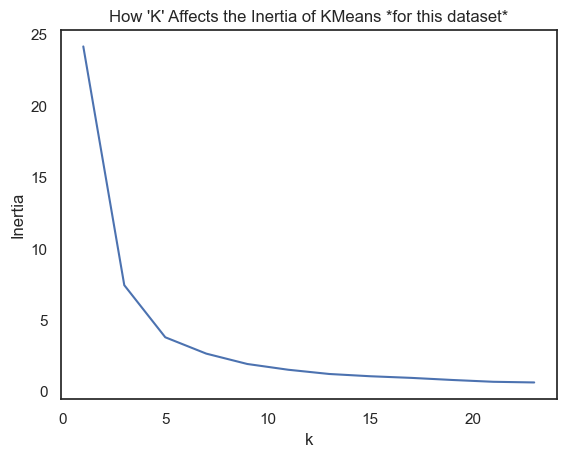

In [184]:
from sklearn.cluster import KMeans

# Credit to Prof. Toutounchian of Drexel for inspiring this code: 
# https://github.com/UPstartDeveloper/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_kmeans.ipynb
inertias = []
K = range(1, 25, 2)
for potential_k in K:
    # fit the k-means for a given k to the data (X)
    model = KMeans(n_clusters=potential_k)
    model.fit(predictor_data)
    # record the inertia
    inertias.append(model.inertia_)

# Plot the elbow 
plt.plot(K, inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("How 'K' Affects the Inertia of KMeans *for this dataset*")
plt.show()

As we can see from this plot, the optimal value of `k` for our clustering algorithm is about 5.